In [96]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt

In [99]:
filepath = r'./files'
data = pd.read_csv(f'{filepath}/peptide_rmsd.csv')
keys = data.keys()
x = data['Time (ps)']
y = data['P1_RMSD']
y1 = data['P2_RMSD']
xp3 = data['P3_Time']
y2 = data['P3_RMSD']
xp4 = data['P4_Time']
y3 = data['P4_RMSD']
xp5 = data['P5_Time']
y4 = data['P5_RMSD']


0          0.0
1        700.0
2       1400.0
3       2100.0
4       2800.0
         ...  
1162       NaN
1163       NaN
1164       NaN
1165       NaN
1166       NaN
Name: Time (ps), Length: 1167, dtype: float64


findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.


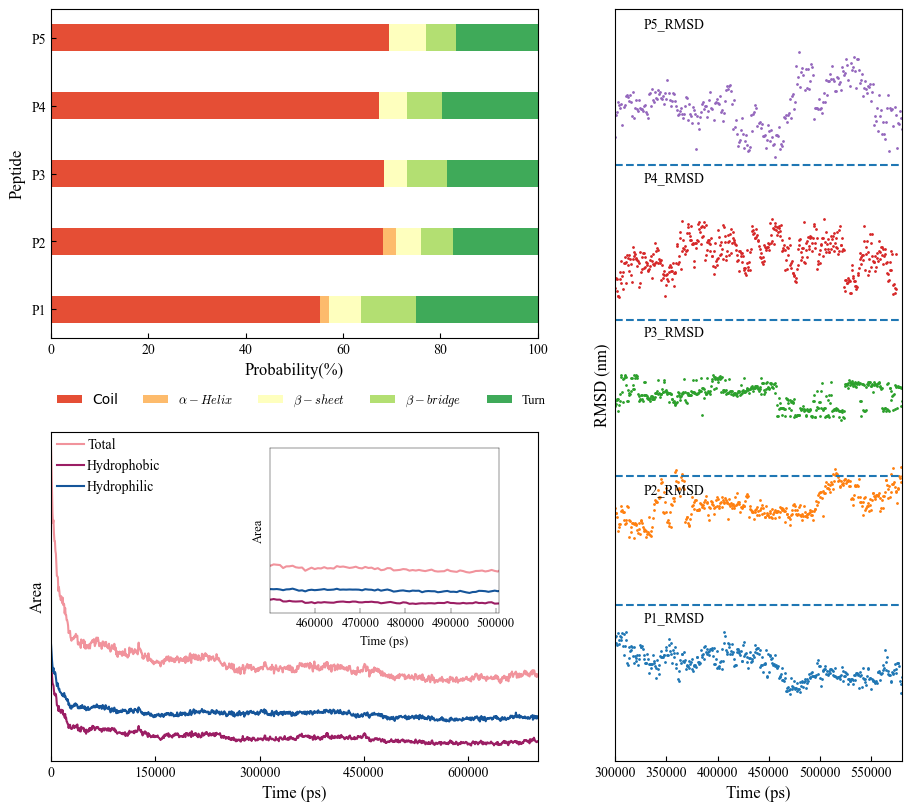

In [123]:
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


def plot_c(ax, xname, yname, lc, label='', movey=0, marker='*', ms=10, mfc='w'):
    x = data[xname].values
    y = data[yname].values

    ax.scatter(x, y + movey, s=1)


    # para = np.polyfit(x, y + movey, 3)
    # p = np.poly1d(para)
    # ax.plot(x, p(x), color='r')
    # ax.plot(x, y + movey,
    #         '-', color=lc, label=label,
    #         linewidth=0, marker=marker,
    #         markeredgecolor='none',
    #         markersize=ms,
    #         markerfacecolor=mfc)


def plotfig3(ax, xname, yname, lc, label, movey=0.5):
    x = data[xname]
    y = data[yname]
    ax.plot(x, y + movey, '-', color=lc, label=label)


fig, axs = plt.subplots(2, 2,
                        gridspec_kw={
                            "width_ratios": [1.7, 1], "height_ratios": [1, 1]
                        },
                        figsize=(9, 8), constrained_layout=True)

gs = axs[0][0].get_gridspec()

axbig = fig.add_subplot(gs[:, 1])
axs[0][1].remove()
axs[1][1].remove()
ax = axs[0][0]
category_names = ['Coil', r"$\alpha-Helix$", r"$\beta-sheet$", r"$\beta-bridge$", 'Turn']
results = {
    'P1': [55.31, 1.88, 6.56, 11.25, 25.0],
    'P2': [68.13, 2.81, 5.0, 6.56, 17.5],
    'P3': [68.44, 0.0, 4.69, 8.13, 18.75],
    'P4': [67.44, 0.0, 5.69, 7.13, 19.75],
    'P5': [69.44, 0.0, 7.69, 6.13, 16.75],
}
height = 0.4
labels = list(results.keys())
data = np.array(list(results.values()))

data_cum = data.cumsum(axis=1)

category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))  #提取颜色
for i in range(0, data.shape[1]):
    starts = data_cum[:, i] - data[:, i]
    widths = data[:, i]
    ax.barh(labels, widths, left=starts, height=height, color=category_colors[i], label=category_names[i])
    xcenters = starts + widths / 2
    r, g, b, _ = category_colors[i]  #获取rgb值

labels = ax.legend(ncol=len(category_names), loc='lower left', bbox_to_anchor=(-0.01, -0.25), fontsize=9,
                   frameon=False).get_texts()
[label.set_fontname('Times New Roman') for label in labels]
label = labels[0]
label.set_fontproperties('SimSun')
ax.set_xlim(0, 100)
ax.set_xlabel('Probability(%)', fontsize=12)
ax.set_ylabel('Peptide', fontsize=12)
# Figure 4b
data = pd.read_csv(f'{filepath}/p1_vx_area_700pro_lig.csv')
ax = axs[1][0]
x = data['Time ']
y = data['Total']
y1 = data['Hydrophobic']
y2 = data['Hydrophilic']

#1
plotfig3(ax, 'Time ', 'Total', (241 / 255, 147 / 255, 156 / 255), label='Total', movey=0)
#2
plotfig3(ax, 'Time ', 'Hydrophobic', (155 / 255, 30 / 255, 100 / 255), label='Hydrophobic', movey=0.3, )
#3
plotfig3(ax, 'Time ', 'Hydrophilic', (21 / 255, 85 / 255, 154 / 255), label='Hydrophilic', movey=50)
ax.legend(loc='upper left', frameon=False, borderaxespad=0, handletextpad=0.2)

ax.set_xlim(0, 700001)
ax.xaxis.set_major_locator(MultipleLocator(150000))
ax.yaxis.set_ticks([])
ax.set_xlabel('Time (ps)', fontsize=12)
ax.set_ylabel('Area', fontsize=12)
#局部放大图
axin = ax.inset_axes([0.45, 0.45, 0.47, 0.5], transform=ax.transAxes)
fontsize_axin = 9
lw = 0.3
axin.yaxis.set_ticks([])
axin.set_xlim(450006, 500714)

axin.set_xlabel('Time (ps)', fontsize=fontsize_axin)
axin.set_ylabel('Area', fontsize=fontsize_axin)
axin.tick_params(axis='x', which='major', labelsize=fontsize_axin, width=lw, direction='in')
axin.tick_params(axis='x', which='minor', width=lw / 2, direction='in')
axin.spines['right'].set_linewidth(lw)
axin.spines['left'].set_linewidth(lw)
axin.spines['top'].set_linewidth(lw)
axin.spines['bottom'].set_linewidth(lw)
ax = axin
#1
plotfig3(ax, 'Time ', 'Total', (241 / 255, 147 / 255, 156 / 255), label='Total', movey=0)
#2
plotfig3(ax, 'Time ', 'Hydrophobic', (155 / 255, 30 / 255, 100 / 255), label='Hydrophobic', movey=0.3, )
#3
plotfig3(ax, 'Time ', 'Hydrophilic', (21 / 255, 85 / 255, 154 / 255), label='Hydrophilic', movey=50)

data = pd.read_csv(f'{filepath}/peptide_rmsd.csv')

ax = axbig

plot_c(ax, 'Time (ps)', 'P1_RMSD', 'k', 'P1_RMSD', movey=-3, marker='o', mfc='gray', ms=3)
plot_c(ax, 'Time (ps)', 'P2_RMSD', 'r', 'P2_RMSD', movey=0, marker='o', mfc='gray', ms=3)
plot_c(ax, 'P3_Time', 'P3_RMSD', 'g', 'P3_RMSD', movey=2.5, marker='o', mfc='gray', ms=3)
plot_c(ax, 'P4_Time', 'P4_RMSD', 'b', 'P4_RMSD', movey=4, marker='o', mfc='gray', ms=3)
plot_c(ax, 'P5_Time', 'P5_RMSD', 'm', 'P5_RMSD', movey=8, marker='o', mfc='gray', ms=3)

ax.set_ylabel('RMSD (nm)', fontsize=12)
ax.set_xlabel('Time (ps)', fontsize=12)
ax.set_xlim(300000, 580000)
ax.set_ylim(1, 15.5)
ax.tick_params(axis='x', which='both', direction='in')
ax.yaxis.set_ticks([])

x = data['Time (ps)']
y = data['P1_RMSD'] - 3

ax.text(0.10, 0.99, 'P5_RMSD', va='top', ha='left', transform=ax.transAxes)
ax.text(0.10, 0.785, 'P4_RMSD', va='top', ha='left', transform=ax.transAxes)
ax.text(0.10, 0.58, 'P3_RMSD', va='top', ha='left', transform=ax.transAxes)
ax.text(0.10, 0.37, 'P2_RMSD', va='top', ha='left', transform=ax.transAxes)
ax.text(0.10, 0.2, 'P1_RMSD', va='top', ha='left', transform=ax.transAxes)
plt.axhline(y=4, linestyle='dashed')
plt.axhline(y=6.5, linestyle='dashed')
plt.axhline(y=9.5, linestyle='dashed')
plt.axhline(y=12.5, linestyle='dashed')

plt.show()

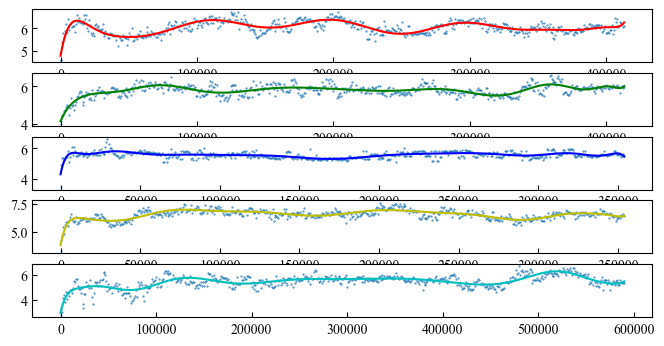

In [121]:
from matplotlib import pyplot as plt
fig = plt.figure(num='panel', figsize=(8,4))

data = pd.read_csv(f'{filepath}/peptide_rmsd.csv')

data = data.dropna()


# 'Time (ps)', 'P1_RMSD',
# 'Time (ps)', 'P2_RMSD',
# 'P3_Time'  , 'P3_RMSD',
# 'P4_Time'  , 'P4_RMSD',
# 'P5_Time'  , 'P5_RMSD',

headers_x = ['Time (ps)', 'Time (ps)', 'P3_Time', 'P4_Time', 'P5_Time']
headers_y = ['P1_RMSD','P2_RMSD','P3_RMSD','P4_RMSD','P5_RMSD']

p1 = fig.add_subplot(5,1,1)
p2 = fig.add_subplot(5,1,2)
p3 = fig.add_subplot(5,1,3)
p4 = fig.add_subplot(5,1,4)
p5 = fig.add_subplot(5,1,5)

plots = [p1, p2, p3, p4, p5]

colors = ['r', 'g', 'b', 'y', 'c']

for header_x, header_y, plot, color in zip(headers_x, headers_y, plots, colors):
    x = data[header_x]
    y = data[header_y]
    plot.scatter(x,y,s=0.2)
    parameter = np.polyfit(x, y, 17)
    func = np.poly1d(parameter)
    plot.plot(x, func(x), color=color)



# print(data.shape)
# print(data.shape)
# x, y = data['Time (ps)'], data['P1_RMSD']
# p1.scatter(x,y,s=0.2)
#
# parameter = np.polyfit(x, y, 17)
# p = np.poly1d(parameter)
# p1.plot(x, p(x), color='r')
# plt.show()